<div style="text-align: center;">
  <h2>Stage 1: Data Preparation and Initial Exploration</h2>
</div>

### **Import libraries and packages, define functions**

In [1011]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter

The function below allows us to format to format the values adding an 'M' that stands for millions or 'T' for thousands, for better visibility.

In [1012]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

### **1. Load and import the two datase**

In [1013]:
population_df = pd.read_csv('PEA11.20231013T111046.csv')
migration_df = pd.read_csv('PEA18.20231016T141007.csv')

### **2.	Examine the structure and shape of the datasets**

#### Get the size of the dataset

In [1014]:
population_dataset_size = population_df.size
migration_dataset_size = migration_df.size

In [1015]:
print("There are", population_dataset_size, "values in total across the whole population dataset")
print("There are", migration_dataset_size, "values in total across the whole migration dataset")

There are 118170 values in total across the whole population dataset
There are 31968 values in total across the whole migration dataset


#### Get the shape of the datasets

In [1016]:
pop_rows, pop_columns = population_df.shape
mig_rows, mig_columns = migration_df.shape

print(f"For the population dataset the Number of rows is {pop_rows}, the Number of columns is {pop_columns}")
print(f"For the migration dataset the Number of rows is {mig_rows}, the Number of columns is {mig_columns}")

For the population dataset the Number of rows is 11817, the Number of columns is 10
For the migration dataset the Number of rows is 2664, the Number of columns is 12


#### Sample data

Displaying the first few rows of the data, to get a sense of what the data looks like

In [1017]:
print("Population dataset")
population_df.head(7)

Population dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876


In [1018]:
print("Imigration dataset")
migration_df.head(7)

Imigration dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


#### Data types and info

In [1019]:
print(f"Population dataset info:")
print()
population_df.info()

Population dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [1020]:
print("Migrration dataset info:")
print()
migration_df.info()

Migrration dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


#### Column names

In [1021]:
population_column_names = population_df.columns
migration_column_names = migration_df.columns

In [1022]:
print("Population dataset column names:", list(population_column_names))
print()
print("Migration dataset column names:", list(migration_column_names))

Population dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02076V03371', 'Single Year of Age', 'C02199V02655', 'Sex', 'UNIT', 'VALUE']

Migration dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02719V03286', 'Country', 'C02199V02655', 'Sex', 'C02542V03077', 'Origin or Destination', 'UNIT', 'VALUE']


#### Descriptive statistics

Obtaining descriptive statistics for numerical columns, including count, mean, standard deviation, minimum, and maximum

In [1023]:
population_summary = population_df.describe()
migration_summary = migration_df.describe()

In [1024]:
population_summary

,TLIST(A1),Year,VALUE
count,11817.000000,11817.000000,1.181700e+04
mean,1996.410256,1996.410256,5.352461e+04
std,24.463165,24.463165,2.867754e+05
min,1926.000000,1926.000000,6.000000e+00
25%,1986.000000,1986.000000,1.242700e+04
50%,2004.000000,2004.000000,2.667500e+04
75%,2014.000000,2014.000000,3.557700e+04
max,2023.000000,2023.000000,5.281612e+06


In [1025]:
migration_summary

,TLIST(A1),Year,C02542V03077,VALUE
count,2664.000000,2664.000000,2664.000000,2104.000000
mean,2005.000000,2005.000000,3.333333,8.943726
std,10.679083,10.679083,1.699992,15.513703
min,1987.000000,1987.000000,1.000000,-43.900000
25%,1996.000000,1996.000000,1.000000,1.800000
50%,2005.000000,2005.000000,4.000000,4.700000
75%,2014.000000,2014.000000,5.000000,10.200000
max,2023.000000,2023.000000,5.000000,151.100000


#### Check for Duplicates

In [1026]:
population_duplicates = population_df.duplicated().sum()
print(f"Number of duplicate rows in the migration dataset is {population_duplicates}")


Number of duplicate rows in the migration dataset is 0


In [1027]:
migration_duplicates = migration_df.duplicated().sum()
print(f"Number of duplicate rows in the migration dataset is {migration_duplicates}")

Number of duplicate rows in the migration dataset is 0


### **3.	Perform basic data cleaning and data type conversion.**

#### Handling Missing Values

Another important step is to check if we have some missing values within the dataset. This can be done in various ways. First, I am using the .isna() function which returns a DataFrame which return a boolean - True if the corresponding element in the original DataFrame is missing (NaN), and False otherwise. However, an easy way to see the sum of all NaN values for each column is to use the .sum() function. In the following dataset we can confirm that we do not have any NaN values. 

In [1028]:
population_missing_data = population_df.isna()
population_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11812,False,False,False,False,False,False,False,False,False,False
11813,False,False,False,False,False,False,False,False,False,False
11814,False,False,False,False,False,False,False,False,False,False
11815,False,False,False,False,False,False,False,False,False,False


In [1029]:
migration_missing_data = migration_df.isna()
migration_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,False,False,False,False,False,False,False,False,False,False,False,False
2660,False,False,False,False,False,False,False,False,False,False,False,False
2661,False,False,False,False,False,False,False,False,False,False,False,False
2662,False,False,False,False,False,False,False,False,False,False,False,False


Using heatmap to visualize if there are missing values.

In [1030]:
population_missing_values = population_df.isnull().sum()
population_missing_values

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

<Axes: >

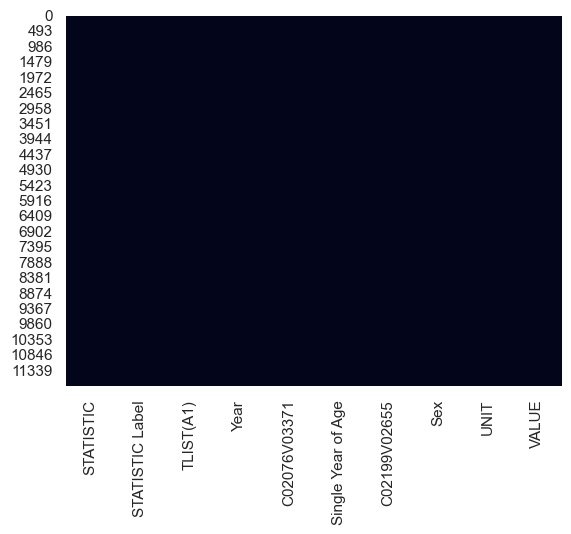

In [1031]:
sns.heatmap(population_df.isnull(), cbar=False)

In [1032]:
migration_missing_values = migration_df.isnull().sum()
migration_missing_values

STATISTIC                  0
STATISTIC Label            0
TLIST(A1)                  0
Year                       0
C02719V03286               0
Country                    0
C02199V02655               0
Sex                        0
C02542V03077               0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

Usind heatmap to visualize the missing values.

<Axes: >

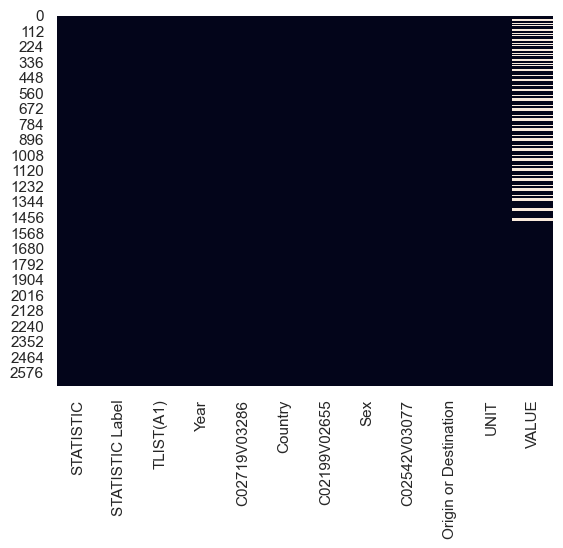

In [1033]:
sns.heatmap(migration_df.isnull(), cbar=False)

In [1034]:
migration_df = migration_df.dropna()
migration_df

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,PEA18,Estimated Migration (Persons in April),2023,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,4,Emigrants: All destinations,Thousand,3.6
2660,PEA18,Estimated Migration (Persons in April),2023,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,5,Immigrants: All origins,Thousand,3.9
2661,PEA18,Estimated Migration (Persons in April),2023,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,1,Net migration,Thousand,-0.2
2662,PEA18,Estimated Migration (Persons in April),2023,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,4,Emigrants: All destinations,Thousand,5.2


In [1035]:
migration_missing_values = migration_df.isnull().sum()
migration_missing_values

STATISTIC                0
STATISTIC Label          0
TLIST(A1)                0
Year                     0
C02719V03286             0
Country                  0
C02199V02655             0
Sex                      0
C02542V03077             0
Origin or Destination    0
UNIT                     0
VALUE                    0
dtype: int64

<Axes: >

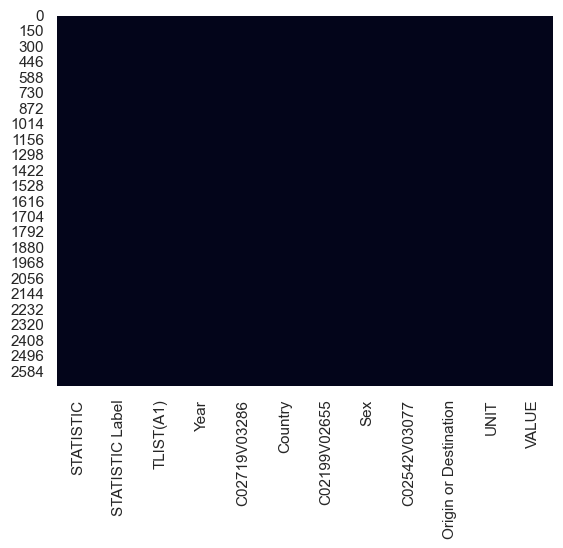

In [1036]:
sns.heatmap(migration_df.isnull(), cbar=False)

#### Dropping irrelevant columns and renaming the labeled columns

In [1037]:
population_df = population_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
population_df

,Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,2023,098,98 years,1,Male,Number,197
11813,2023,098,98 years,2,Female,Number,632
11814,2023,646,99 years and over,-,Both sexes,Number,1600
11815,2023,646,99 years and over,1,Male,Number,352


In [1038]:
population_df = population_df.rename(columns={'C02076V03371':'Age category', 'C02199V02655':'Sex category'})
population_df.head(10)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
5,1926,200,Under 1 year,2,Female,Number,27307
6,1926,001,1 year,-,Both sexes,Number,55876
7,1926,001,1 year,1,Male,Number,28374
8,1926,001,1 year,2,Female,Number,27502
9,1926,002,2 years,-,Both sexes,Number,58273


In [1039]:
migration_df = migration_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
migration_df.head(7)

,Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


In [1040]:
migration_df = migration_df.rename(columns={'C02719V03286':'Country category', 'C02199V02655':'Sex category', 'C02542V03077':'Migration label' })
migration_df.head(7)

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


#### Categorical variables

In [1041]:
population_columns_to_convert = ['Single Year of Age', 'Sex', 'UNIT', 'Age category', 'Sex category']
for column in population_columns_to_convert:
    population_df[column] = population_df[column].astype('category')

data_types = population_df[population_columns_to_convert].dtypes
data_types

Single Year of Age    category
Sex                   category
UNIT                  category
Age category          category
Sex category          category
dtype: object

In [1042]:
migration_columns_to_convert = ['Sex', 'UNIT', 'Sex category', 'Origin or Destination', 'Migration label', 'Country', 'Country category']
for column in migration_columns_to_convert:
    migration_df[column] = migration_df[column].astype('category')

data_types = migration_df[migration_columns_to_convert].dtypes
data_types

Sex                      category
UNIT                     category
Sex category             category
Origin or Destination    category
Migration label          category
Country                  category
Country category         category
dtype: object

#### Dealing with Outliers

Calculate the first quartile (**Q1**) and the third quartile (**Q3**) for the data.\
Compute the **IQR**: IQR Q3 — QI\
**Define outliers** as values that fall outside of the following range:\
**QI - 1.5 x IQR,Q3 + 1.5 x IQR**

**Population dataset**

In [1043]:
Q1 = population_df['VALUE'].quantile(0.25)
Q3 = population_df['VALUE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = population_df[(population_df['VALUE'] < lower_bound) | (population_df['VALUE'] > upper_bound)]

outliers_stats = {
    'Total number of outliers': outliers.shape[0],
    'Percentage of outliers': (outliers.shape[0] / population_df.shape[0]) * 100,
    'Minimum outlier value': outliers['VALUE'].min(),
    'Maximum outlier value': outliers['VALUE'].max(),
    'IQR': IQR,
    'Lower bound for outliers': lower_bound,
    'Upper bound for outliers': upper_bound
}
# TODO show the output properly without the brackets
outliers_stats


{'Total number of outliers': 463,
 'Percentage of outliers': 3.9180841161039184,
 'Minimum outlier value': 70321,
 'Maximum outlier value': 5281612,
 'IQR': 23150.0,
 'Lower bound for outliers': -22298.0,
 'Upper bound for outliers': 70302.0}

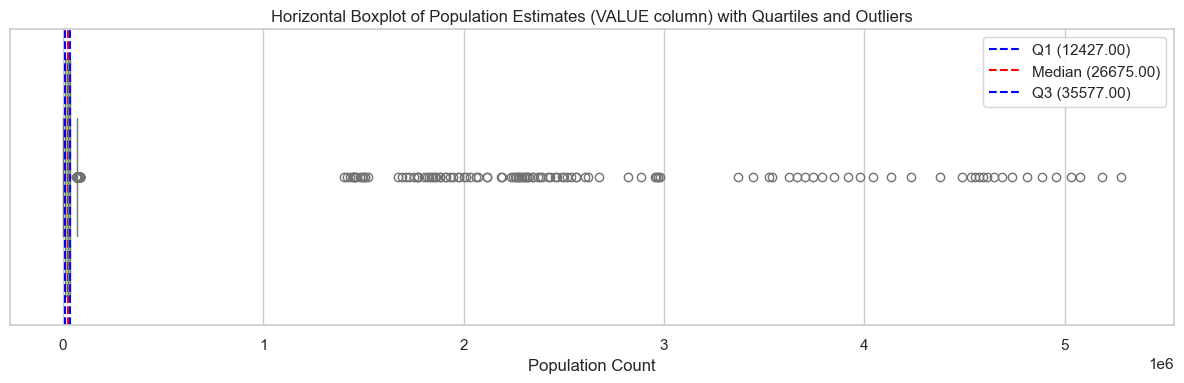

In [1044]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=population_df['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=Q1, color='blue', linestyle='--', label=f"Q1 ({Q1:.2f})")
plt.axvline(x=population_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({population_df['VALUE'].median():.2f})")
plt.axvline(x=Q3, color='blue', linestyle='--', label=f"Q3 ({Q3:.2f})")

plt.title("Horizontal Boxplot of Population Estimates (VALUE column) with Quartiles and Outliers")
plt.xlabel("Population Count")
plt.legend()
plt.tight_layout()
plt.show()

Zoomed-in version of the horizontal boxplot for the VALUE column

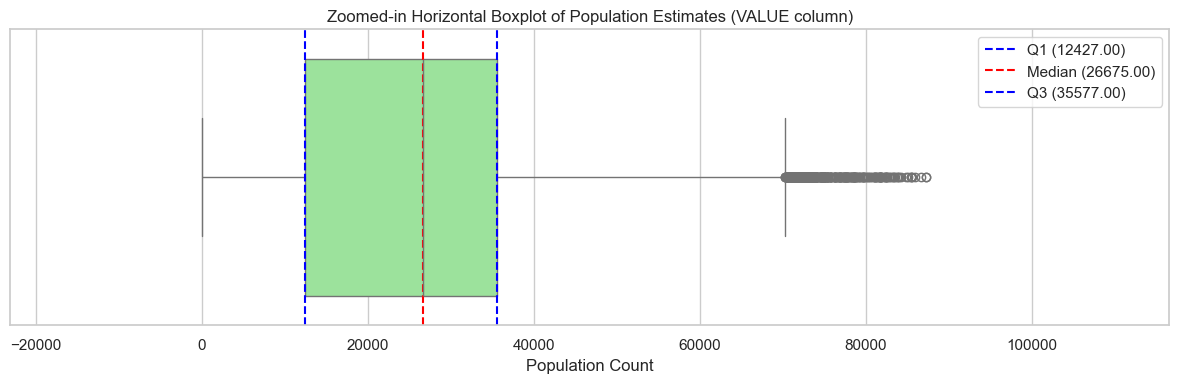

In [1045]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=population_df['VALUE'], color="lightgreen", orient="h")
plt.xlim([population_df['VALUE'].min() - IQR, upper_bound + 2 * IQR])

plt.axvline(x=Q1, color='blue', linestyle='--', label=f"Q1 ({Q1:.2f})")
plt.axvline(x=population_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({population_df['VALUE'].median():.2f})")
plt.axvline(x=Q3, color='blue', linestyle='--', label=f"Q3 ({Q3:.2f})")

plt.title("Zoomed-in Horizontal Boxplot of Population Estimates (VALUE column)")
plt.xlabel("Population Count")
plt.legend()
plt.tight_layout()
plt.show()

This visualization provides a more detailed view of the distribution's central tendency, interquartile range, and nearby outliers

The focus has been narrowed to the region around the box and the nearby outliers, allowing for a clearer view of the box and whiskers. \
The dashed lines still represent the Q1 (blue), median (red), and Q3 (blue) values.

**The outliers in the population dataset are because we have rows with All ages that show the sum of the value for all ages, hence I will create a separate dataframe that only has 'All ages' and 'Male' and 'Female' (removing 'Both sexes).**

In [1046]:
population_df_all_ages = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] != 'Both sexes')]
population_df_all_ages.head(7)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
304,1936,-,All ages,1,Male,Number,1520454
305,1936,-,All ages,2,Female,Number,1447966
607,1946,-,All ages,1,Male,Number,1494877
608,1946,-,All ages,2,Female,Number,1460230
910,1951,-,All ages,1,Male,Number,1506597


In [1047]:
Q1 = population_df_all_ages['VALUE'].quantile(0.25)
Q3 = population_df_all_ages['VALUE'].quantile(0.75)
IQR = Q3 - Q1

pop_lower_bound = Q1 - 1.5 * IQR
pop_upper_bound = Q3 + 1.5 * IQR

outliers = population_df_all_ages[(population_df_all_ages['VALUE'] < pop_lower_bound) | (population_df_all_ages['VALUE'] > pop_upper_bound)]

outliers_stats = {
    'Total number of outliers': outliers.shape[0],
    'Percentage of outliers': (outliers.shape[0] / population_df_all_ages.shape[0]) * 100,
    'Minimum outlier value': outliers['VALUE'].min(),
    'Maximum outlier value': outliers['VALUE'].max(),
    'IQR': IQR,
    'Lower bound for outliers': pop_lower_bound,
    'Upper bound for outliers': pop_upper_bound
}
# TODO show the output properly without the brackets
outliers_stats


{'Total number of outliers': 0,
 'Percentage of outliers': 0.0,
 'Minimum outlier value': nan,
 'Maximum outlier value': nan,
 'IQR': 548433.75,
 'Lower bound for outliers': 947355.125,
 'Upper bound for outliers': 3141090.125}

**Migration dataset**

In [1048]:
Q1 = migration_df['VALUE'].quantile(0.25)
Q3 = migration_df['VALUE'].quantile(0.75)
IQR = Q3 - Q1

migr_lower_bound = Q1 - 1.5 * IQR
migr_upper_bound = Q3 + 1.5 * IQR

outliers = migration_df[(migration_df['VALUE'] < migr_lower_bound) | (migration_df['VALUE'] > migr_upper_bound)]

outliers_stats = {
    'Total number of outliers': outliers.shape[0],
    'Percentage of outliers': (outliers.shape[0] / migration_df.shape[0]) * 100,
    'Minimum outlier value': outliers['VALUE'].min(),
    'Maximum outlier value': outliers['VALUE'].max(),
    'IQR': IQR,
    'Lower bound for outliers': migr_lower_bound,
    'Upper bound for outliers': migr_upper_bound
}
# TODO show the output properly without the brackets
outliers_stats


{'Total number of outliers': 257,
 'Percentage of outliers': 12.214828897338403,
 'Minimum outlier value': -43.9,
 'Maximum outlier value': 151.1,
 'IQR': 8.399999999999999,
 'Lower bound for outliers': -10.799999999999997,
 'Upper bound for outliers': 22.799999999999997}

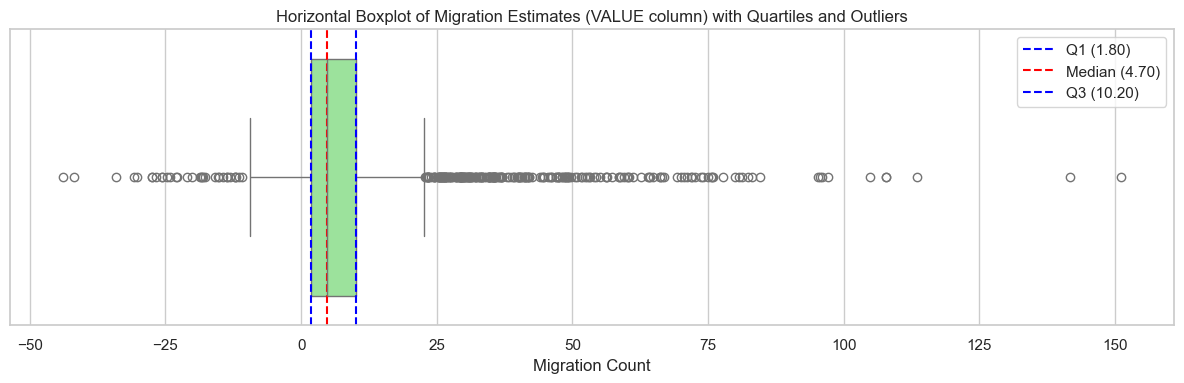

In [1049]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=migration_df['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=Q1, color='blue', linestyle='--', label=f"Q1 ({Q1:.2f})")
plt.axvline(x=migration_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({migration_df['VALUE'].median():.2f})")
plt.axvline(x=Q3, color='blue', linestyle='--', label=f"Q3 ({Q3:.2f})")

plt.title("Horizontal Boxplot of Migration Estimates (VALUE column) with Quartiles and Outliers")
plt.xlabel("Migration Count")
plt.legend()
plt.tight_layout()
plt.show()

### **4.	Generate summary statistics, including measures of central tendency and variability.**

In [1050]:
population_df.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In this dataset, the describe function does not give us enough insight for the number of people because ....... We would need to transform the data and look for the weighted mean, median, etc.

Creating age groups to see population distribution by age

In [1082]:
population_age_breakdown_df = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Year'] > 2012) & (population_df['Sex'] == 'Both sexes')]
population_age_breakdown_df = population_age_breakdown_df.drop(['Sex category', 'Sex'], axis=1)
population_age_breakdown_df

,Year,Age category,Single Year of Age,UNIT,VALUE
8487,2013,200,Under 1 year,Number,68583
8490,2013,001,1 year,Number,71785
8493,2013,002,2 years,Number,70638
8496,2013,003,3 years,Number,71057
8499,2013,004,4 years,Number,70956
...,...,...,...,...,...
11802,2023,095,95 years,Number,2128
11805,2023,096,96 years,Number,1581
11808,2023,097,97 years,Number,1116
11811,2023,098,98 years,Number,829


In [1083]:
try:
    population_age_breakdown_df['Single Year of Age'] = population_age_breakdown_df['Single Year of Age'].replace('Under 1 year', '0 year')
    output = population_age_breakdown_df.head()
except Exception as e:
    output = f"An error occurred: {e}"

output

,Year,Age category,Single Year of Age,UNIT,VALUE
8487,2013,200,0 year,Number,68583
8490,2013,001,1 year,Number,71785
8493,2013,002,2 years,Number,70638
8496,2013,003,3 years,Number,71057
8499,2013,004,4 years,Number,70956


In [1084]:
population_age_breakdown_df['Single Year of Age'] = population_age_breakdown_df['Single Year of Age'].str.extract(r'(\d+)').astype(int)
population_age_breakdown_df

,Year,Age category,Single Year of Age,UNIT,VALUE
8487,2013,200,0,Number,68583
8490,2013,001,1,Number,71785
8493,2013,002,2,Number,70638
8496,2013,003,3,Number,71057
8499,2013,004,4,Number,70956
...,...,...,...,...,...
11802,2023,095,95,Number,2128
11805,2023,096,96,Number,1581
11808,2023,097,97,Number,1116
11811,2023,098,98,Number,829


In [1085]:
population_age_breakdown_df.to_csv("population_age_breakdown_df.csv", index=False)


In [1086]:
def age_group(age):
    if age <= 14:
        return '0-14 years old'
    elif age <= 24:
        return '15-24 years old'
    elif age <= 44:
        return '25-44 years old'
    elif age <= 64:
        return '45-64 years old'
    else:
        return '65 and over'

population_age_breakdown_df['Age Group'] = population_age_breakdown_df['Single Year of Age'].apply(age_group)

population_age_breakdown_df

,Year,Age category,Single Year of Age,UNIT,VALUE,Age Group
8487,2013,200,0,Number,68583,0-14 years old
8490,2013,001,1,Number,71785,0-14 years old
8493,2013,002,2,Number,70638,0-14 years old
8496,2013,003,3,Number,71057,0-14 years old
8499,2013,004,4,Number,70956,0-14 years old
...,...,...,...,...,...,...
11802,2023,095,95,Number,2128,65 and over
11805,2023,096,96,Number,1581,65 and over
11808,2023,097,97,Number,1116,65 and over
11811,2023,098,98,Number,829,65 and over


In [1087]:
weighted_mean = np.average(population_age_breakdown_df["Single Year of Age"], weights=population_age_breakdown_df["VALUE"])

weighted_variance = np.average((population_age_breakdown_df["Single Year of Age"] - weighted_mean)**2, weights=population_age_breakdown_df["VALUE"])
weighted_std = np.sqrt(weighted_variance)

sorted_df = population_age_breakdown_df.sort_values(by="Single Year of Age")
cumsum = sorted_df["VALUE"].cumsum()
cutoff = cumsum.iloc[-1] / 2.0
weighted_median = sorted_df[sorted_df["VALUE"].cumsum() >= cutoff]["Single Year of Age"].iloc[0]

weighted_mean, weighted_median, weighted_std

(37.34308987874954, 37, 22.674593196883585)

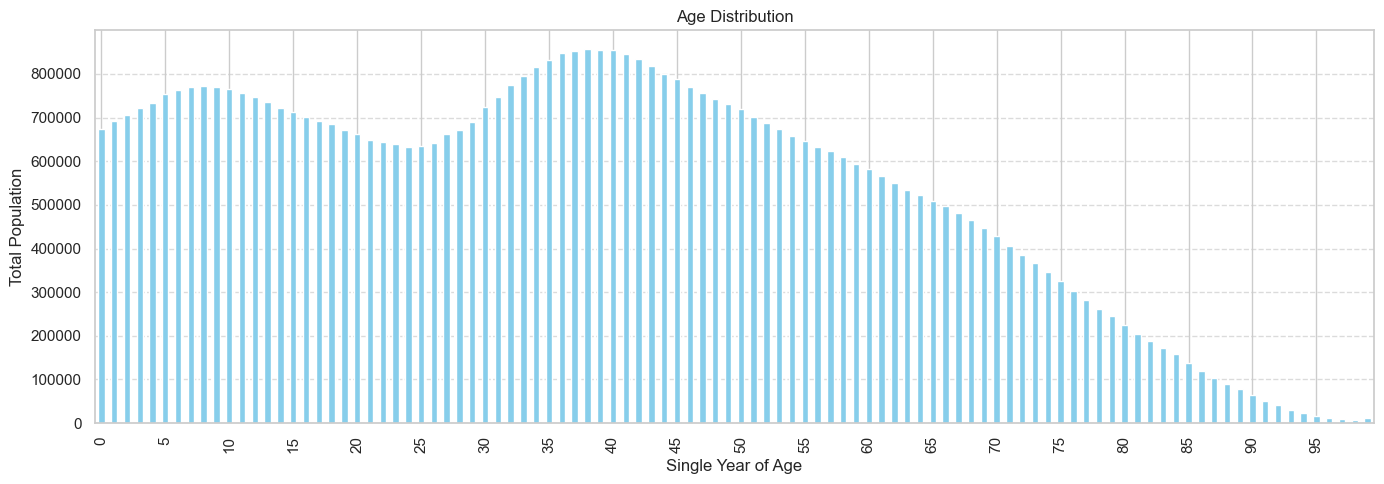

In [1099]:

age_distribution = population_age_breakdown_df.groupby("Single Year of Age")["VALUE"].sum()

plt.figure(figsize=(14, 5))
age_distribution.plot(kind='bar', color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Single Year of Age")
plt.ylabel("Total Population")
plt.xticks(range(0, 100, 5), range(0, 100, 5), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()